In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Load your dataset
df_melted = pd.read_csv('donations_data.csv')  # Replace with your actual file path

# Display the shape of the dataset
print("Dataset shape:", df_melted.shape)
print(df_melted.head())

# Preprocessing: Replace NaN, 'R', and 'O' with 0
df_melted.replace(to_replace=[np.nan, 'R', 'O'], value=0, inplace=True)

# Convert all relevant columns to numeric
df_melted.iloc[:, 1:] = df_melted.iloc[:, 1:].apply(pd.to_numeric, errors='coerce').fillna(0)

# Prepare the data for training
X = df_melted.iloc[:, 1:-1].values  # Features: all months except the last
y = df_melted.iloc[:, -1].values     # Target: last month's donations

# Create a new column for the original indices
df_melted['Original Index'] = df_melted.index

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(
    X, y, df_melted['Original Index'], test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for predicting the next month's total

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_split=0.2)



Dataset shape: (716, 12)
          Members Name 2024-01 2024-02 2024-03 2024-04   2024-05  2024-06  \
0  Noor Fatima Sadaqat       0     500     600       0      0.00      0.0   
1       Zunaira Shafiq    2000     500     750     800      0.00      0.0   
2        Muneeb Salman    6946       0    2000   13610  15750.00  22200.0   
3        Mubasal Malik   32082   50395   11040   62750   6483.00      0.0   
4        Nasir Mukhtar       0    6750    5000    6000  27153.27  20700.0   

   2024-07  2024-08  2024-09  2024-10  2024-11  
0      0.0    300.0   1350.0   1000.0   1390.0  
1      0.0      0.0   5680.0   8755.0   9465.0  
2  29791.0  88200.0  71418.0  49454.0  71311.0  
3    200.0      0.0   3200.0      0.0   4000.0  
4  35356.0  16000.0  18850.0  14000.0  11200.0  
Epoch 1/100


c:\Users\MUNEER IQBAL\miniconda3\envs\python_ml\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 416521920.0000 - val_loss: 178176720.0000
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 102136960.0000 - val_loss: 178129872.0000
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 48505112.0000 - val_loss: 178028272.0000
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 71618840.0000 - val_loss: 177861680.0000
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 43304548.0000 - val_loss: 177573504.0000
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 112509880.0000 - val_loss: 177090992.0000
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 80854280.0000 - val_loss: 176475088.0000
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 135634336.0000 - val_loss: 175603104.0000
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 80673904.0000 - val_loss: 174519792.0000
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 104331600.0000 - val_loss: 173139712.0000
Epoch

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Neural Network: MSE = 11579504.16, R² = 0.79


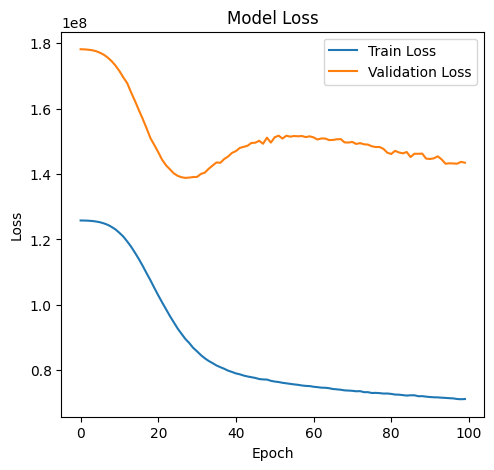

In [14]:
# Make predictions for the test set
y_pred = model.predict(X_test)

# Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Neural Network: MSE = {mse:.2f}, R² = {r2:.2f}")

# Visualize the training history
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()



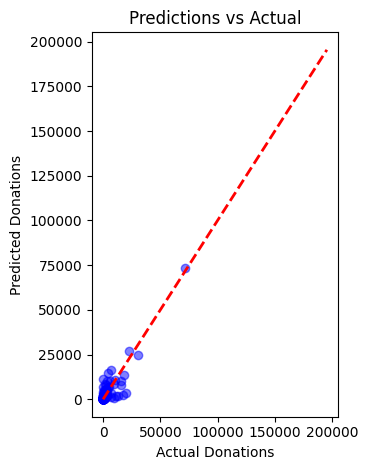

In [15]:
# Plot predictions vs actual values
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title('Predictions vs Actual')
plt.xlabel('Actual Donations')
plt.ylabel('Predicted Donations')

plt.tight_layout()
plt.show()



In [16]:
# Create a DataFrame to save predictions using the original indices
predictions_df = pd.DataFrame({
    'Members Name': df_melted['Members Name'].iloc[test_indices].values,  # Use original index from df_melted
    'Predicted Donations for Next Month': y_pred.flatten()
})

# Save to CSV
predictions_df.to_csv('next_month_donations_predictions_nn.csv', index=False)

print(predictions_df)

       Members Name  Predicted Donations for Next Month
0    Qaiser Shahzad                        13665.215820
1          Zain Ali                          230.131866
2        Afifa Noor                          192.687469
3       Neha Hashmi                         5305.972168
4          Ahtisham                          221.458862
..              ...                                 ...
139         Kamran                          8346.002930
140       Azka ijaz                          223.683014
141   Haroon Ahmad                           385.625702
142  Iqra Musharukh                          219.879761
143   Maryam NAveed                          217.886581

[144 rows x 2 columns]
